https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import spacy
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
import importlib
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p
IFRC_data = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/IFRC/IFRC_result.pdf")

In [4]:
IFRC_data

'Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n must do more to respond to the needs \n of the world™s most vulnerable people\nThe International Federation of Red Cross and Red Crescent Societies is the \nworld™s largest volunteer˜based humanitarian network. With our ˚˛˝ member \nNational Red Cross and Red Crescent Societies worldwide, we are in virtually \nevery community reaching ˚˙˝.ˆ million people annually through long˜term \nservices and development programmes, as well as ˚˚˝ million people through \ndisaster response and early recovery programmes. We act before, during and \naˇer disasters and health emergencies to meet the needs and improve the lives \nof vulnerable people. We do so with impartiality as to nationality, race, gender, \nreligious beliefs, class and political opinions. Guided by \nStrategy ˜˚˜˚\n Œ our \ncollective plan of action to tackle the major humanitarian and development \nchallenges of this decade Œ we are co

In [5]:
clusterIFRC = 'IFRC'
wordsIFRC = IFRC_data

In [6]:
df = pd.DataFrame({'cluster': clusterIFRC, 'words': IFRC_data}, index=[0])

In [7]:
df

,cluster,words
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...


In [8]:
#df.to_pickle('C:/Users/jeanl/Desktop/tenthdimensionanalytics/WFP/wfpdata')

df.to_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/IFRC/IFRCdata")

## Text Pre-Processing

### Expanding Contractions

In [9]:
df['words_description'] = df['words'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,cluster,words,words_description
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector..."


In [10]:
df['words_description_str'] = [' '.join(map(str, l)) for l in df['words_description']]
df.head()

,cluster,words,words_description,words_description_str
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...


### English Language Detection

In [11]:
pretrained_model = "C:/Users/mwamb/Downloads/lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in df['words_description_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
df['langs'] = langs

In [12]:
df

,cluster,words,words_description,words_description_str,langs
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en


## Tokenization

In [13]:
df['tokenized'] = df['words_description_str'].apply(word_tokenize)
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector..."


## Converting all Characters to Lowercase

In [14]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector..."


### Removing Punctuations

In [15]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector..."


### Removing Stopwords

In [16]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector..."


## Stemming vs Lemmatization

In [ ]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

In [ ]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

In [ ]:
df.to_pickle("IFRC_clean_data.pkl")

In [21]:
df.to_csv('IFRC_clean_data.csv')

In [22]:
#with open('indeed_scrape_clean.pkl', 'rb') as pickle_file:
#    df = pickle.load(pickle_file)

In [23]:
df = df[['cluster', 'lemmatized']]
df.head()

,cluster,lemmatized
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu..."


## Sentiment Analysis

In [24]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,cluster,lemmatized,lemma_str
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...


In [25]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,cluster,lemmatized,lemma_str,sentiment
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...,0.055057


In [26]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,cluster,lemmatized,lemma_str,sentiment
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...,0.055057


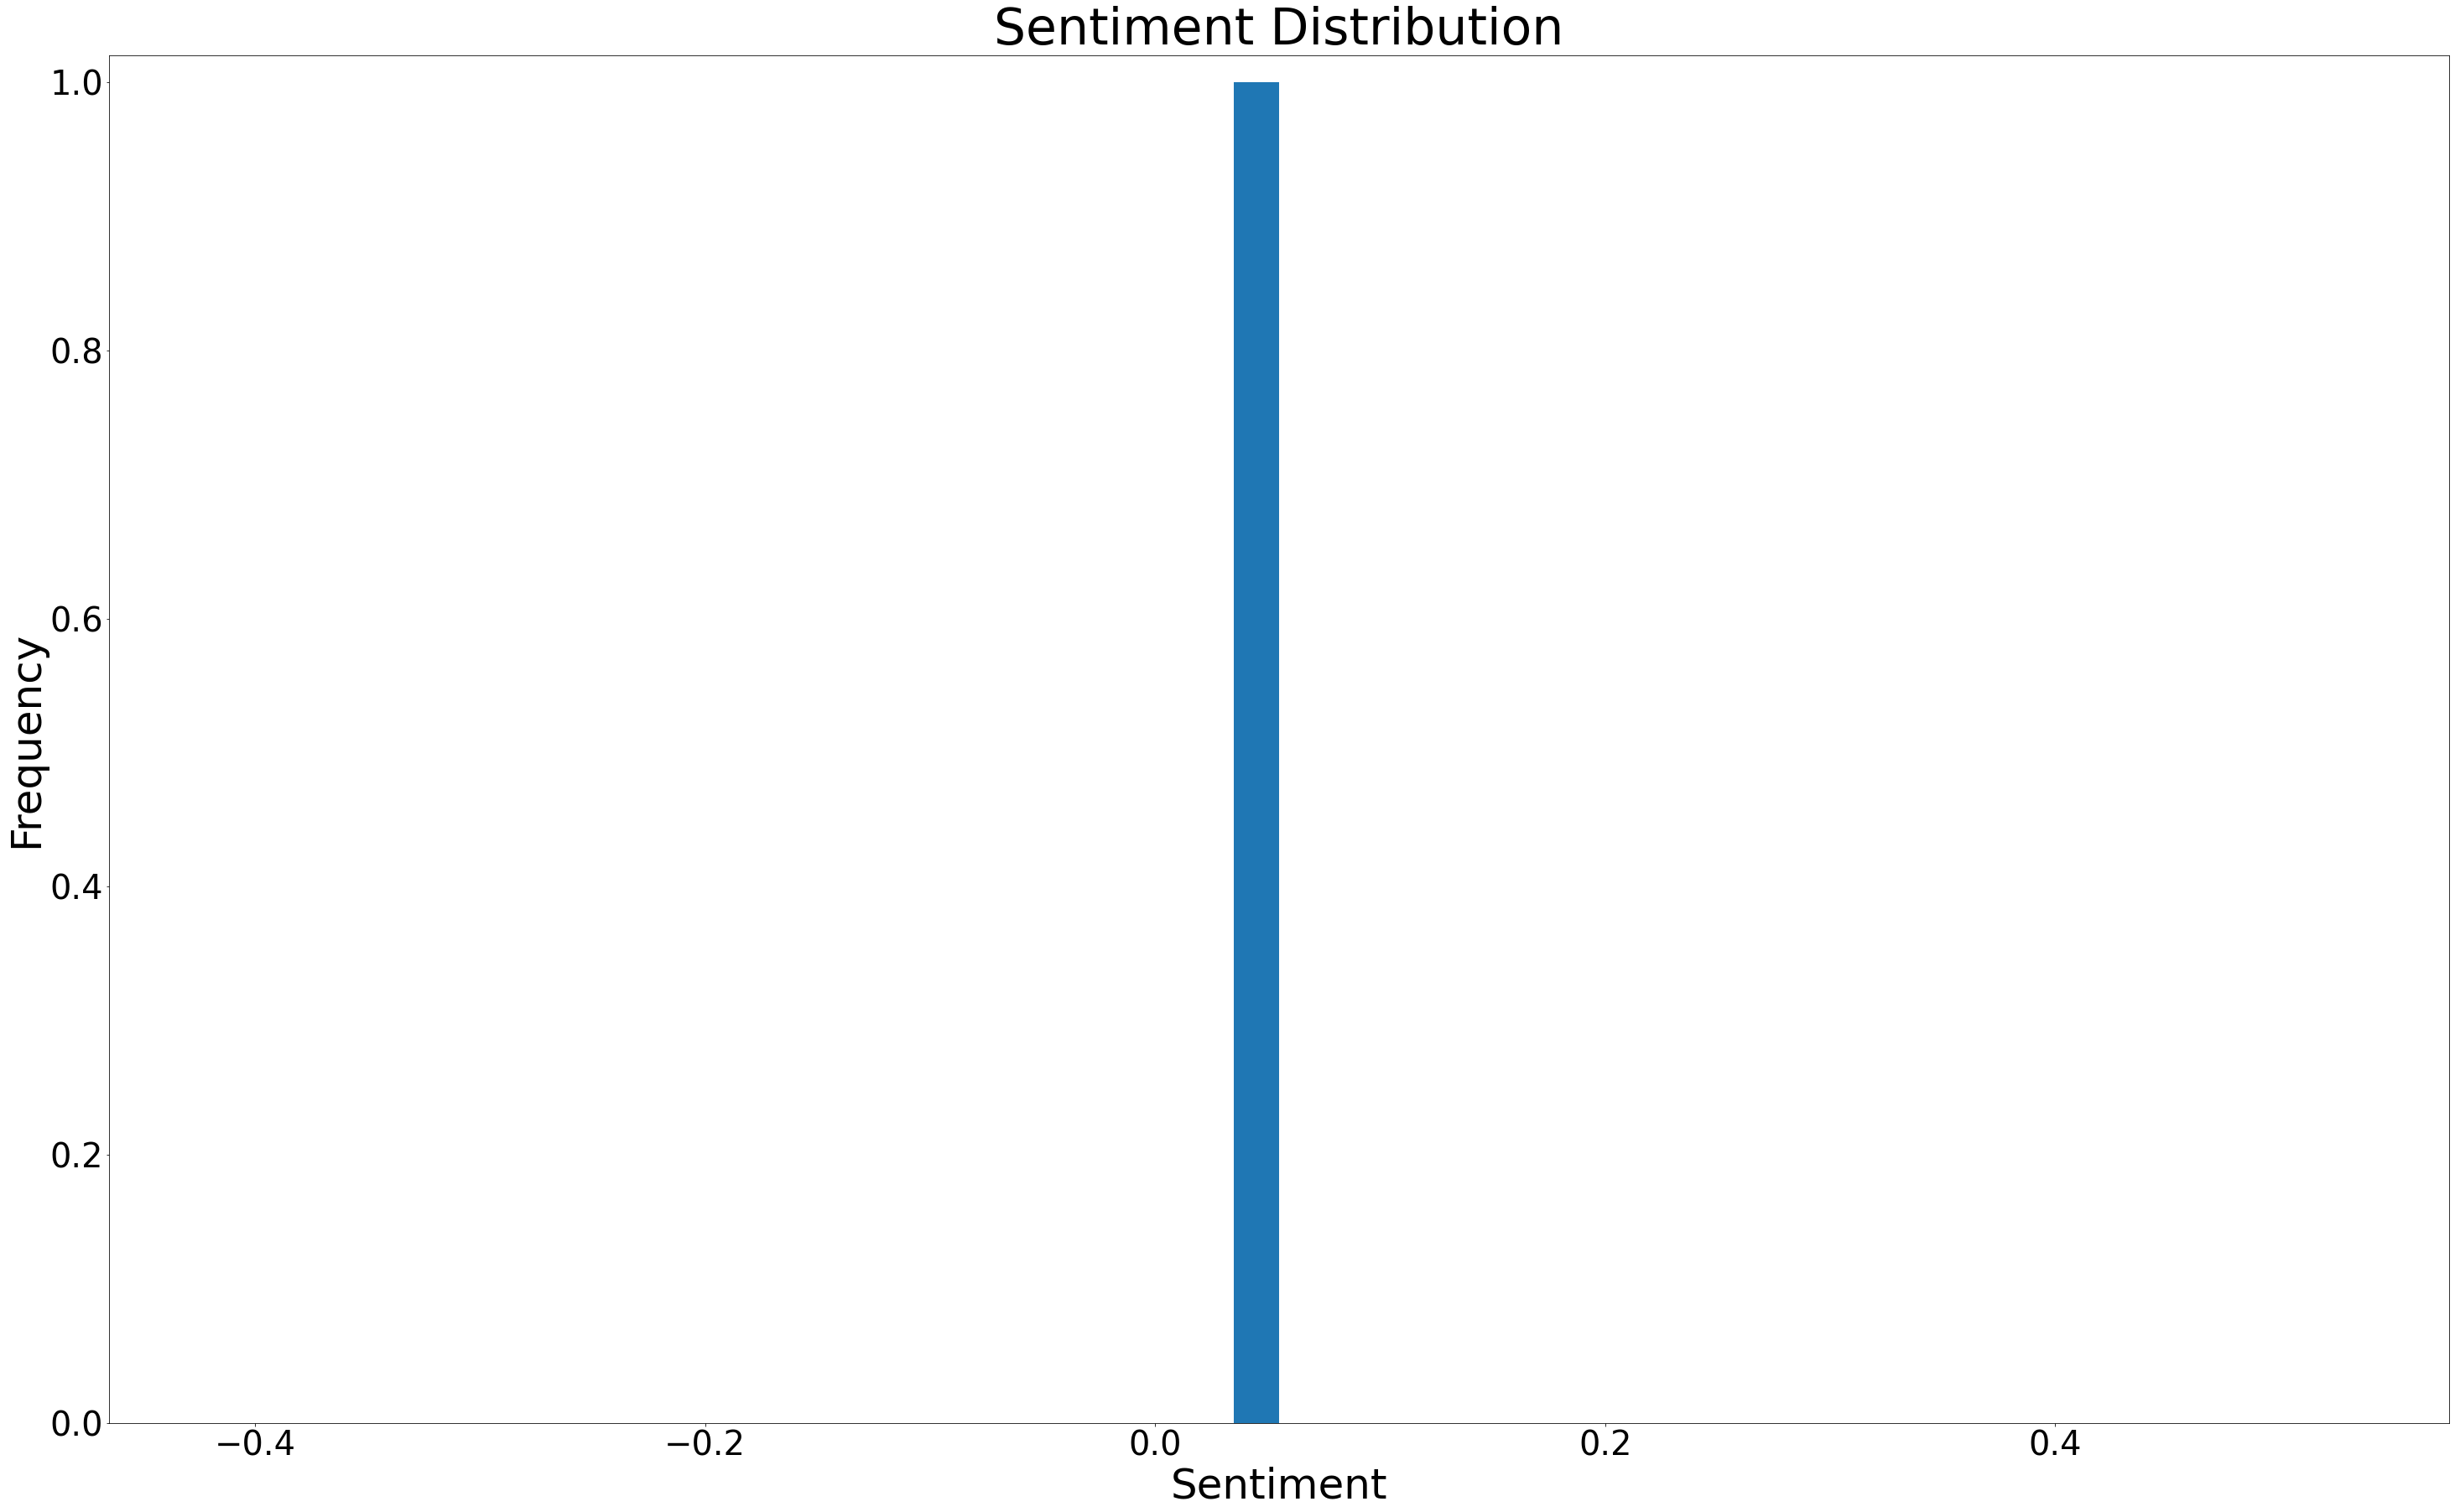

In [27]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0]), [Text(0, 0, 'IFRC')])

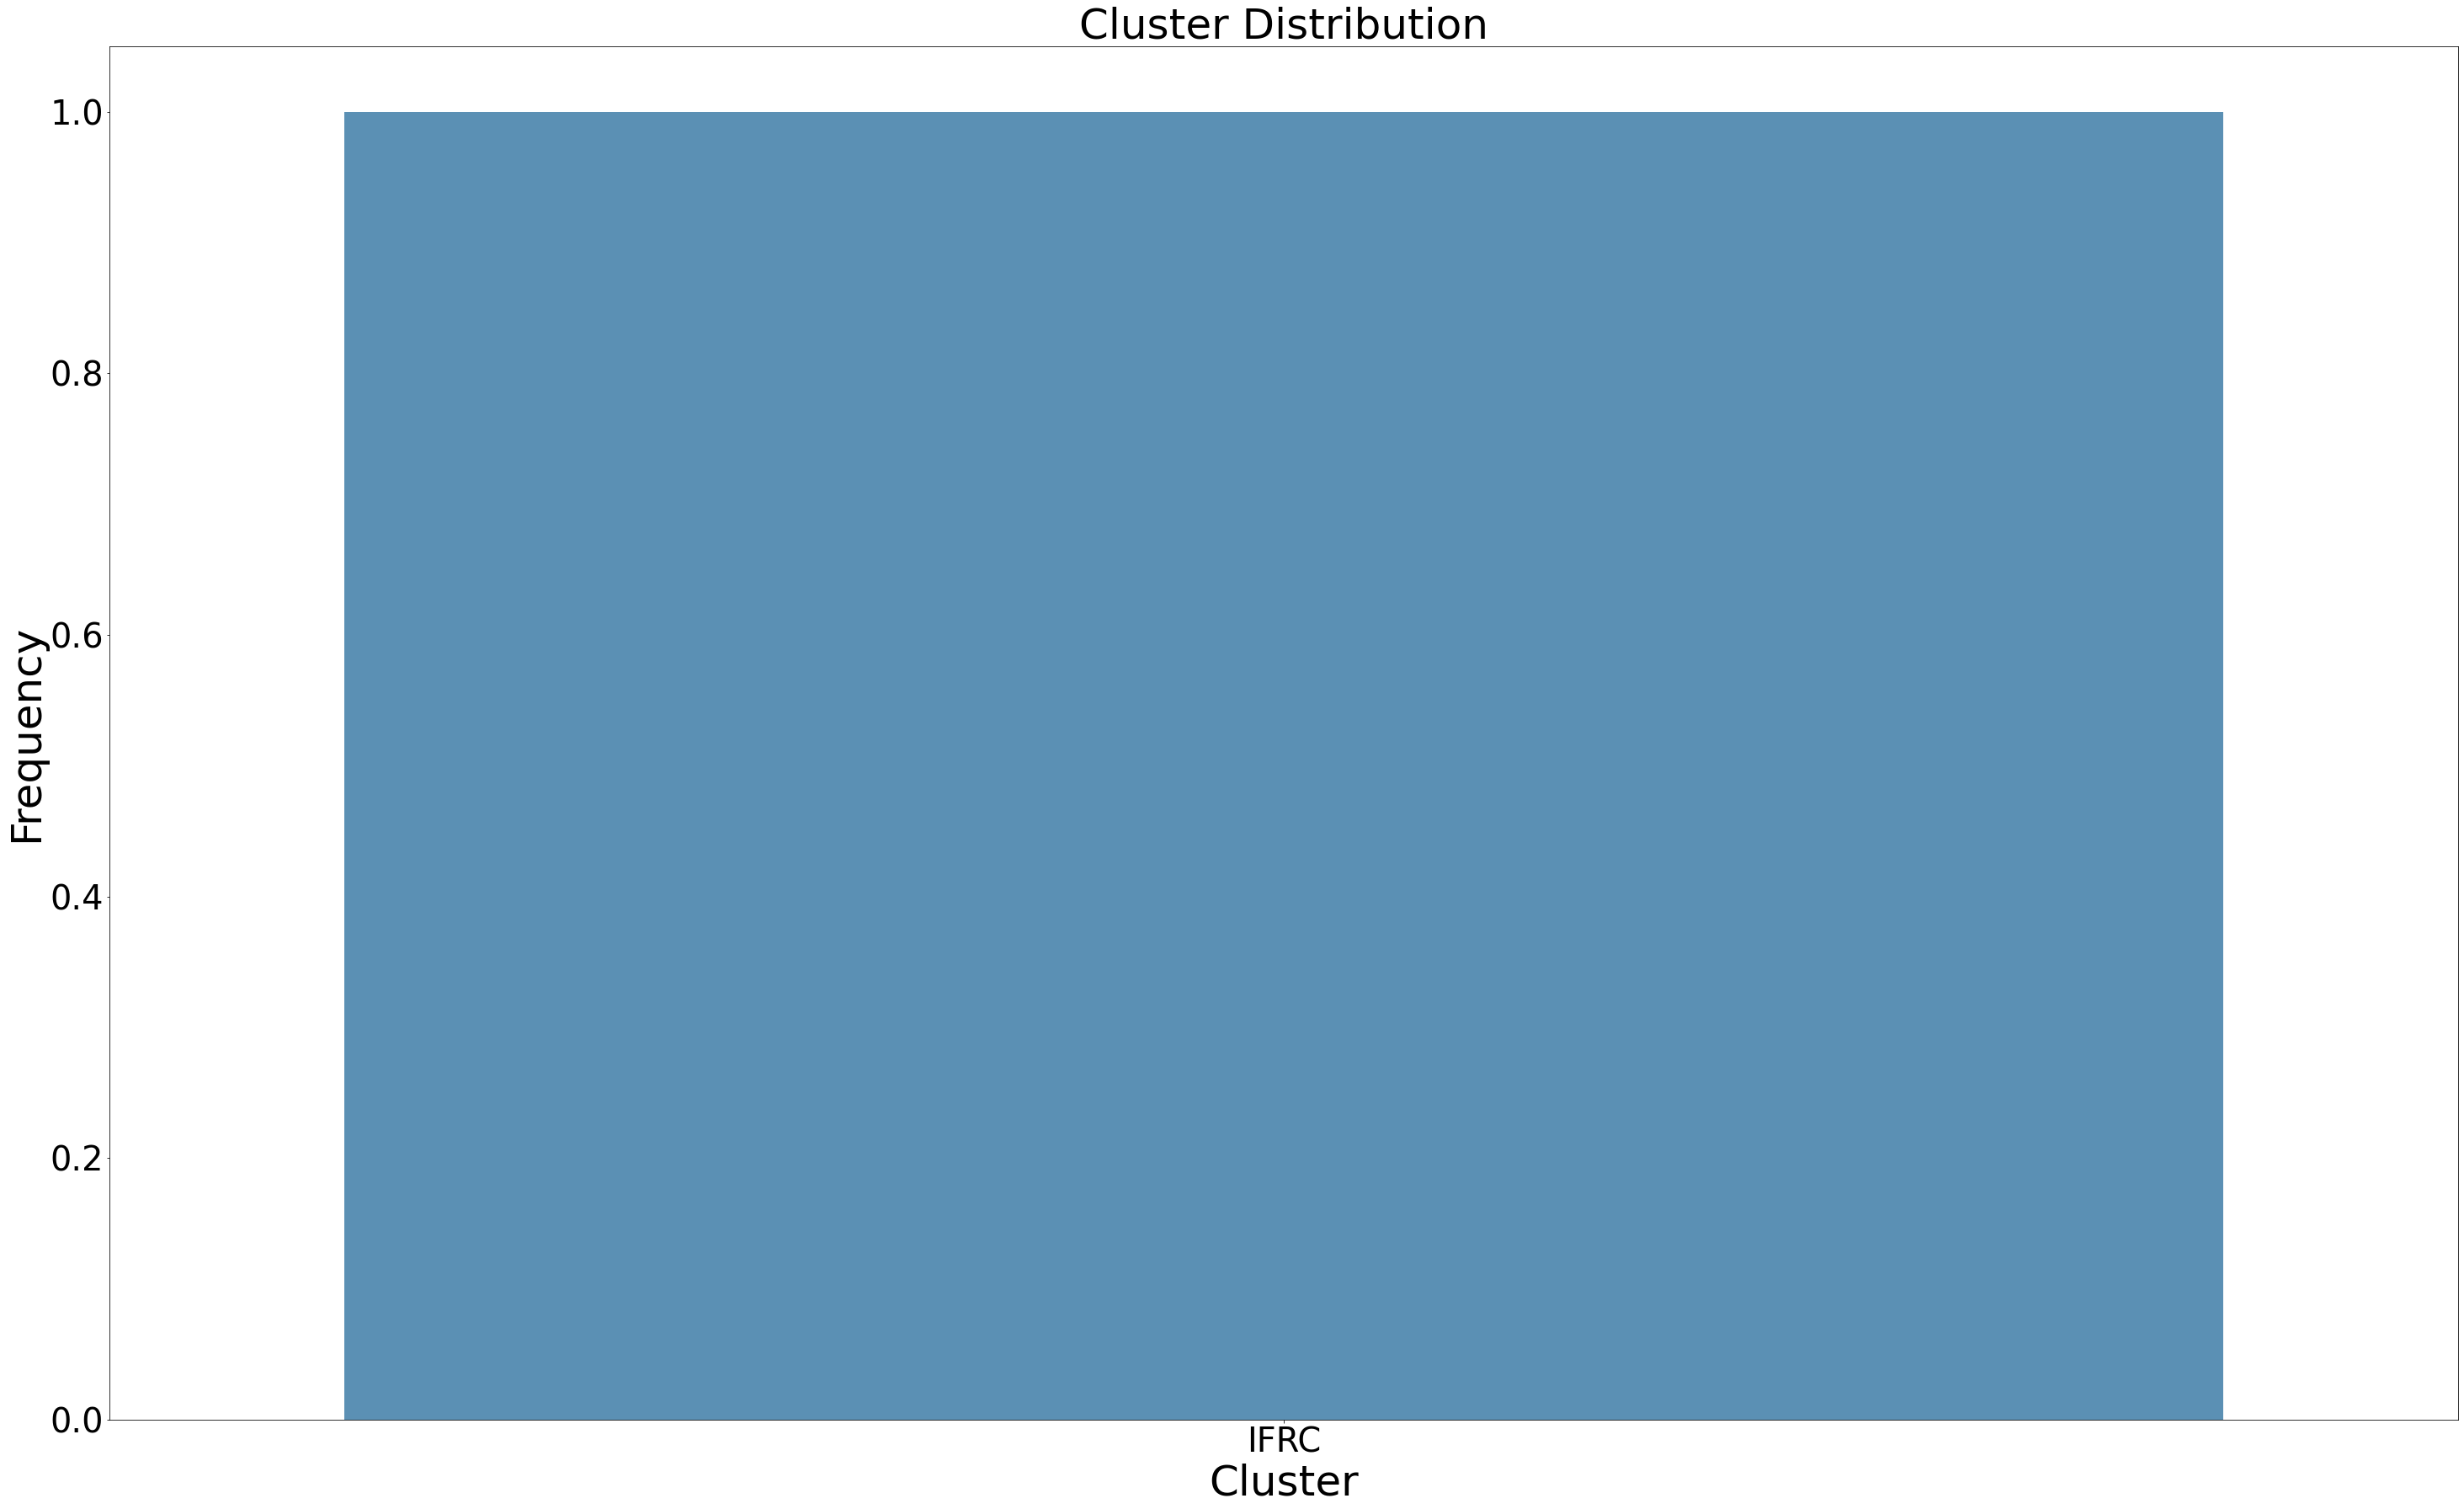

In [28]:
x_cluster = df.cluster.value_counts()
y_cluster = x_cluster.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_cluster.index, x_cluster.values, alpha=0.8)
plt.title("Cluster Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Cluster', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Cluster'}, ylabel='cluster'>

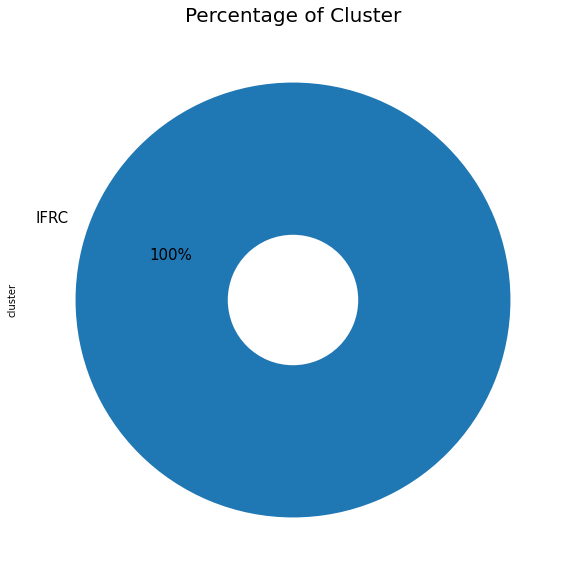

In [29]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Cluster', fontsize=20)
df.cluster.value_counts().plot(kind='pie',
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

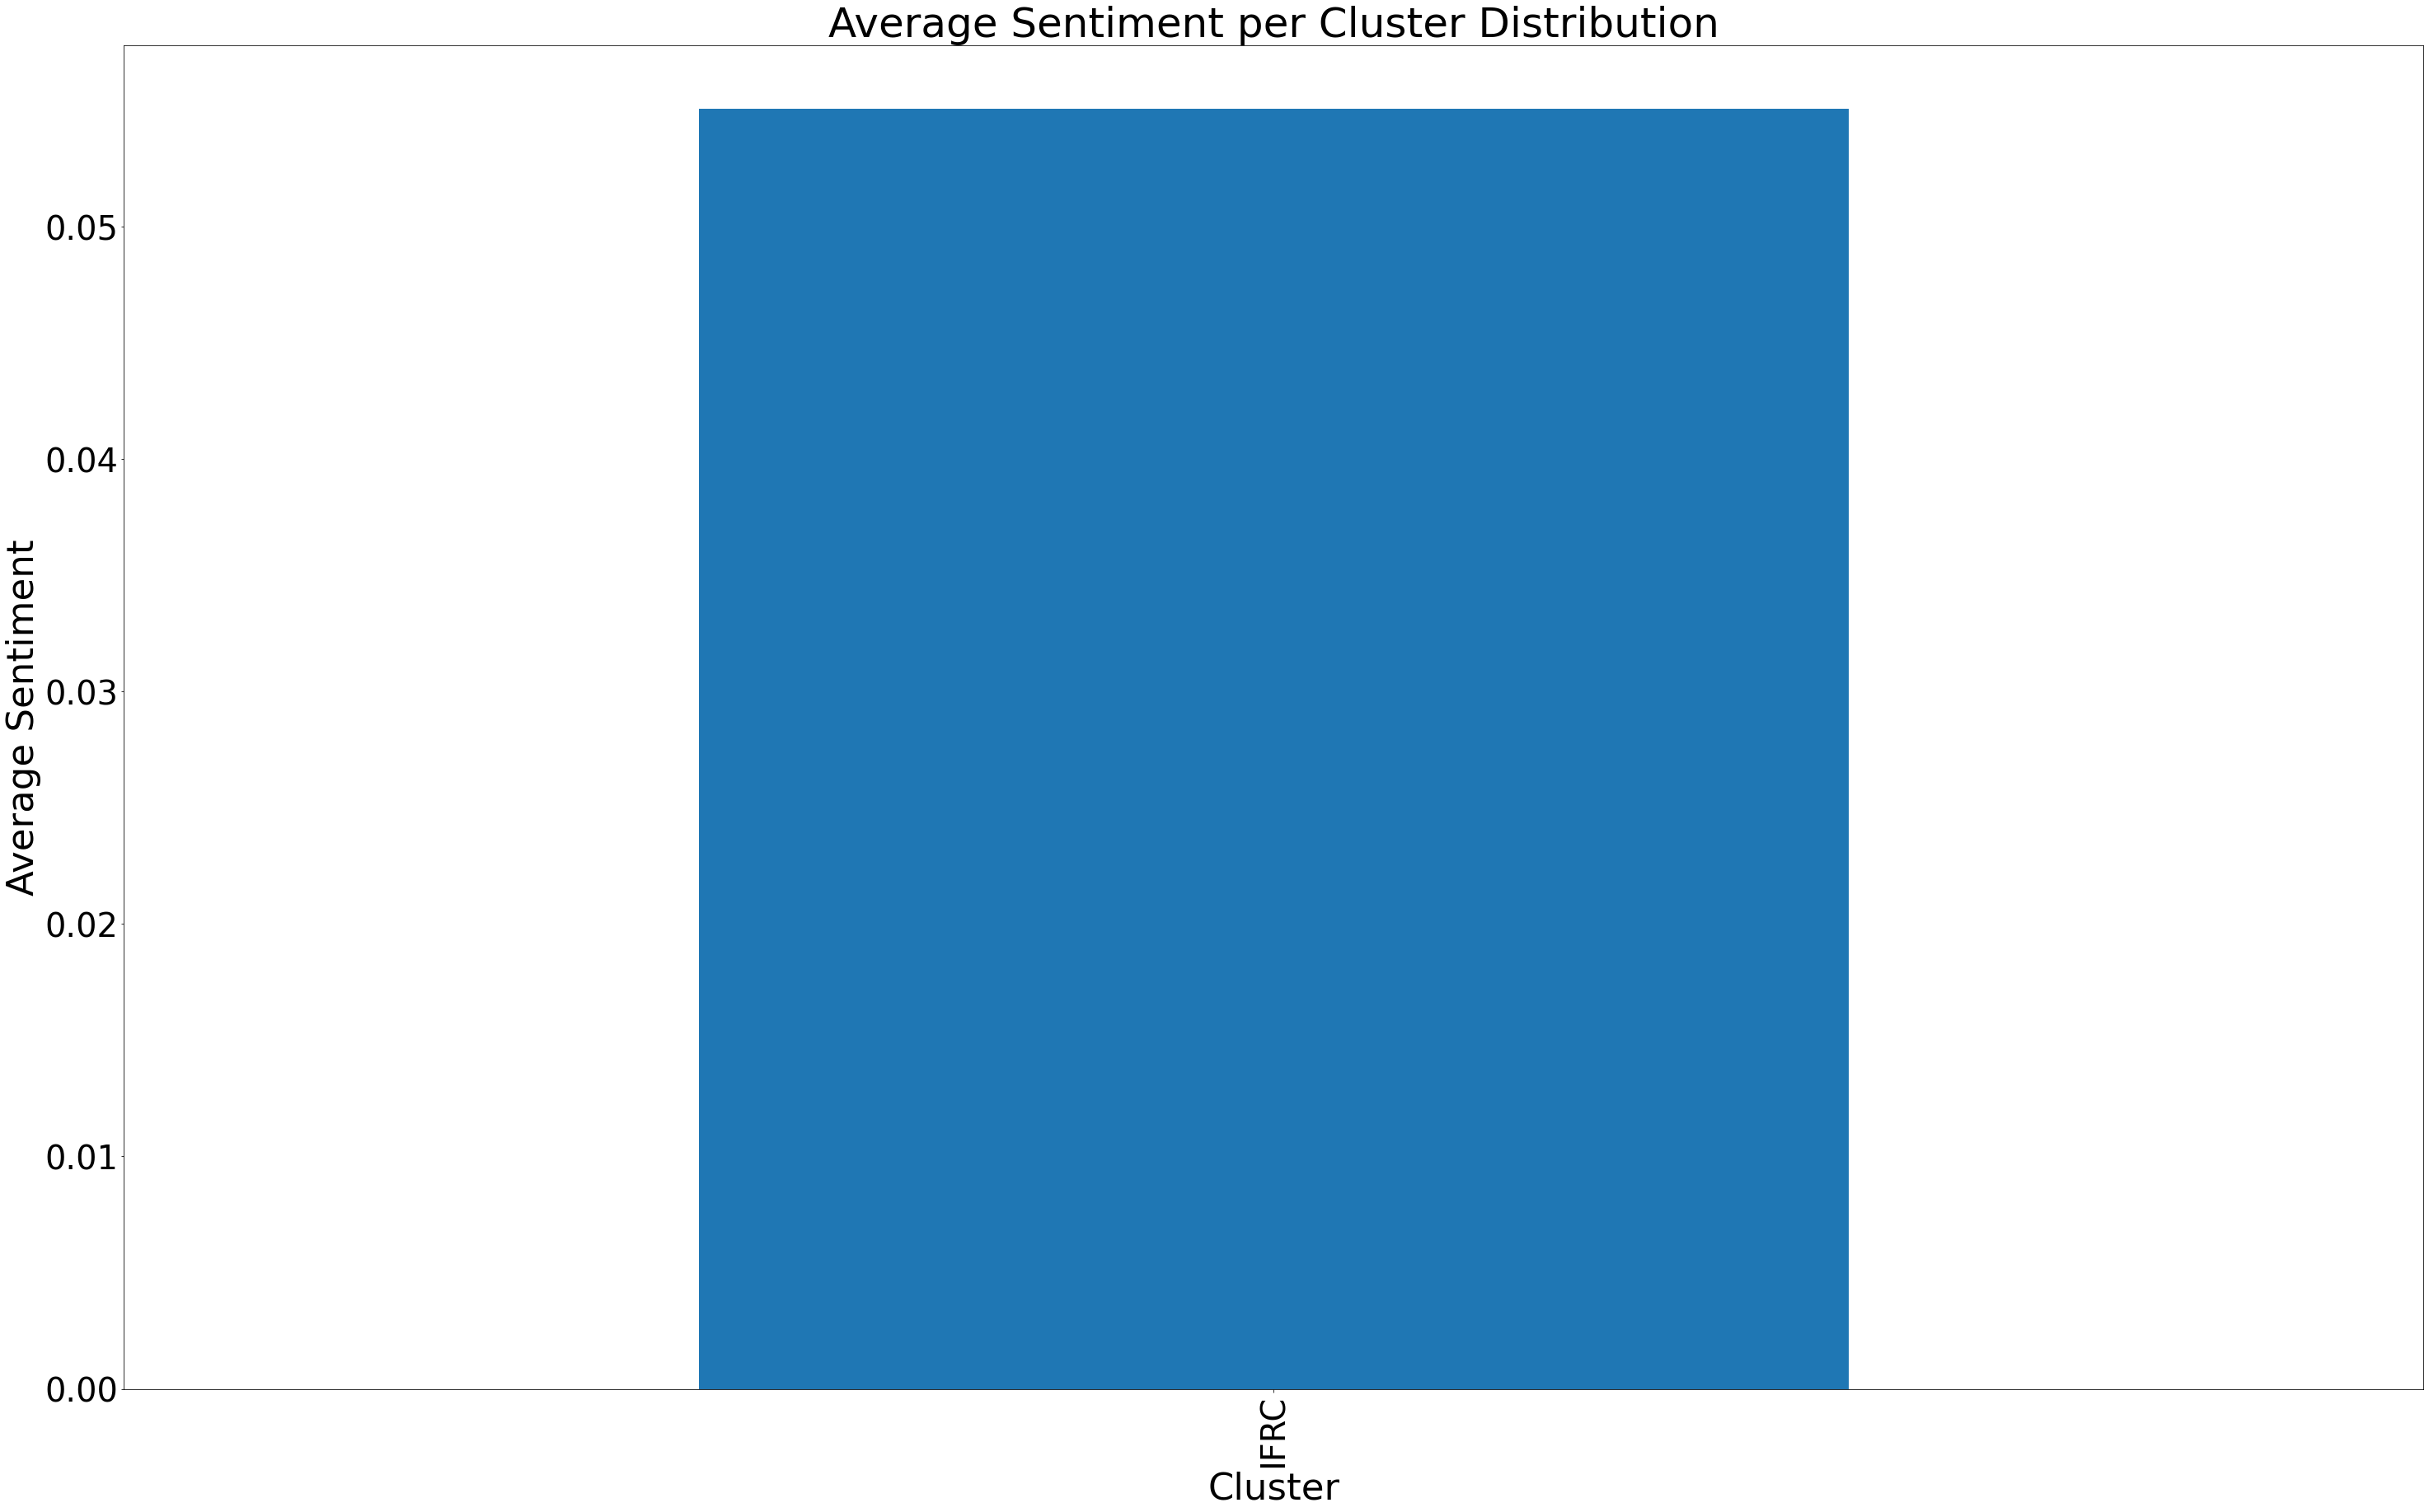

In [30]:
polarity_avg = df.groupby('cluster')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Cluster', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Cluster Distribution', fontsize=50)
plt.show()

In [31]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['word_len'] = df['lemma_str'].astype(str).apply(len)

In [32]:
df

,cluster,lemmatized,lemma_str,sentiment,word_count,word_len
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...,0.055057,87331,671979


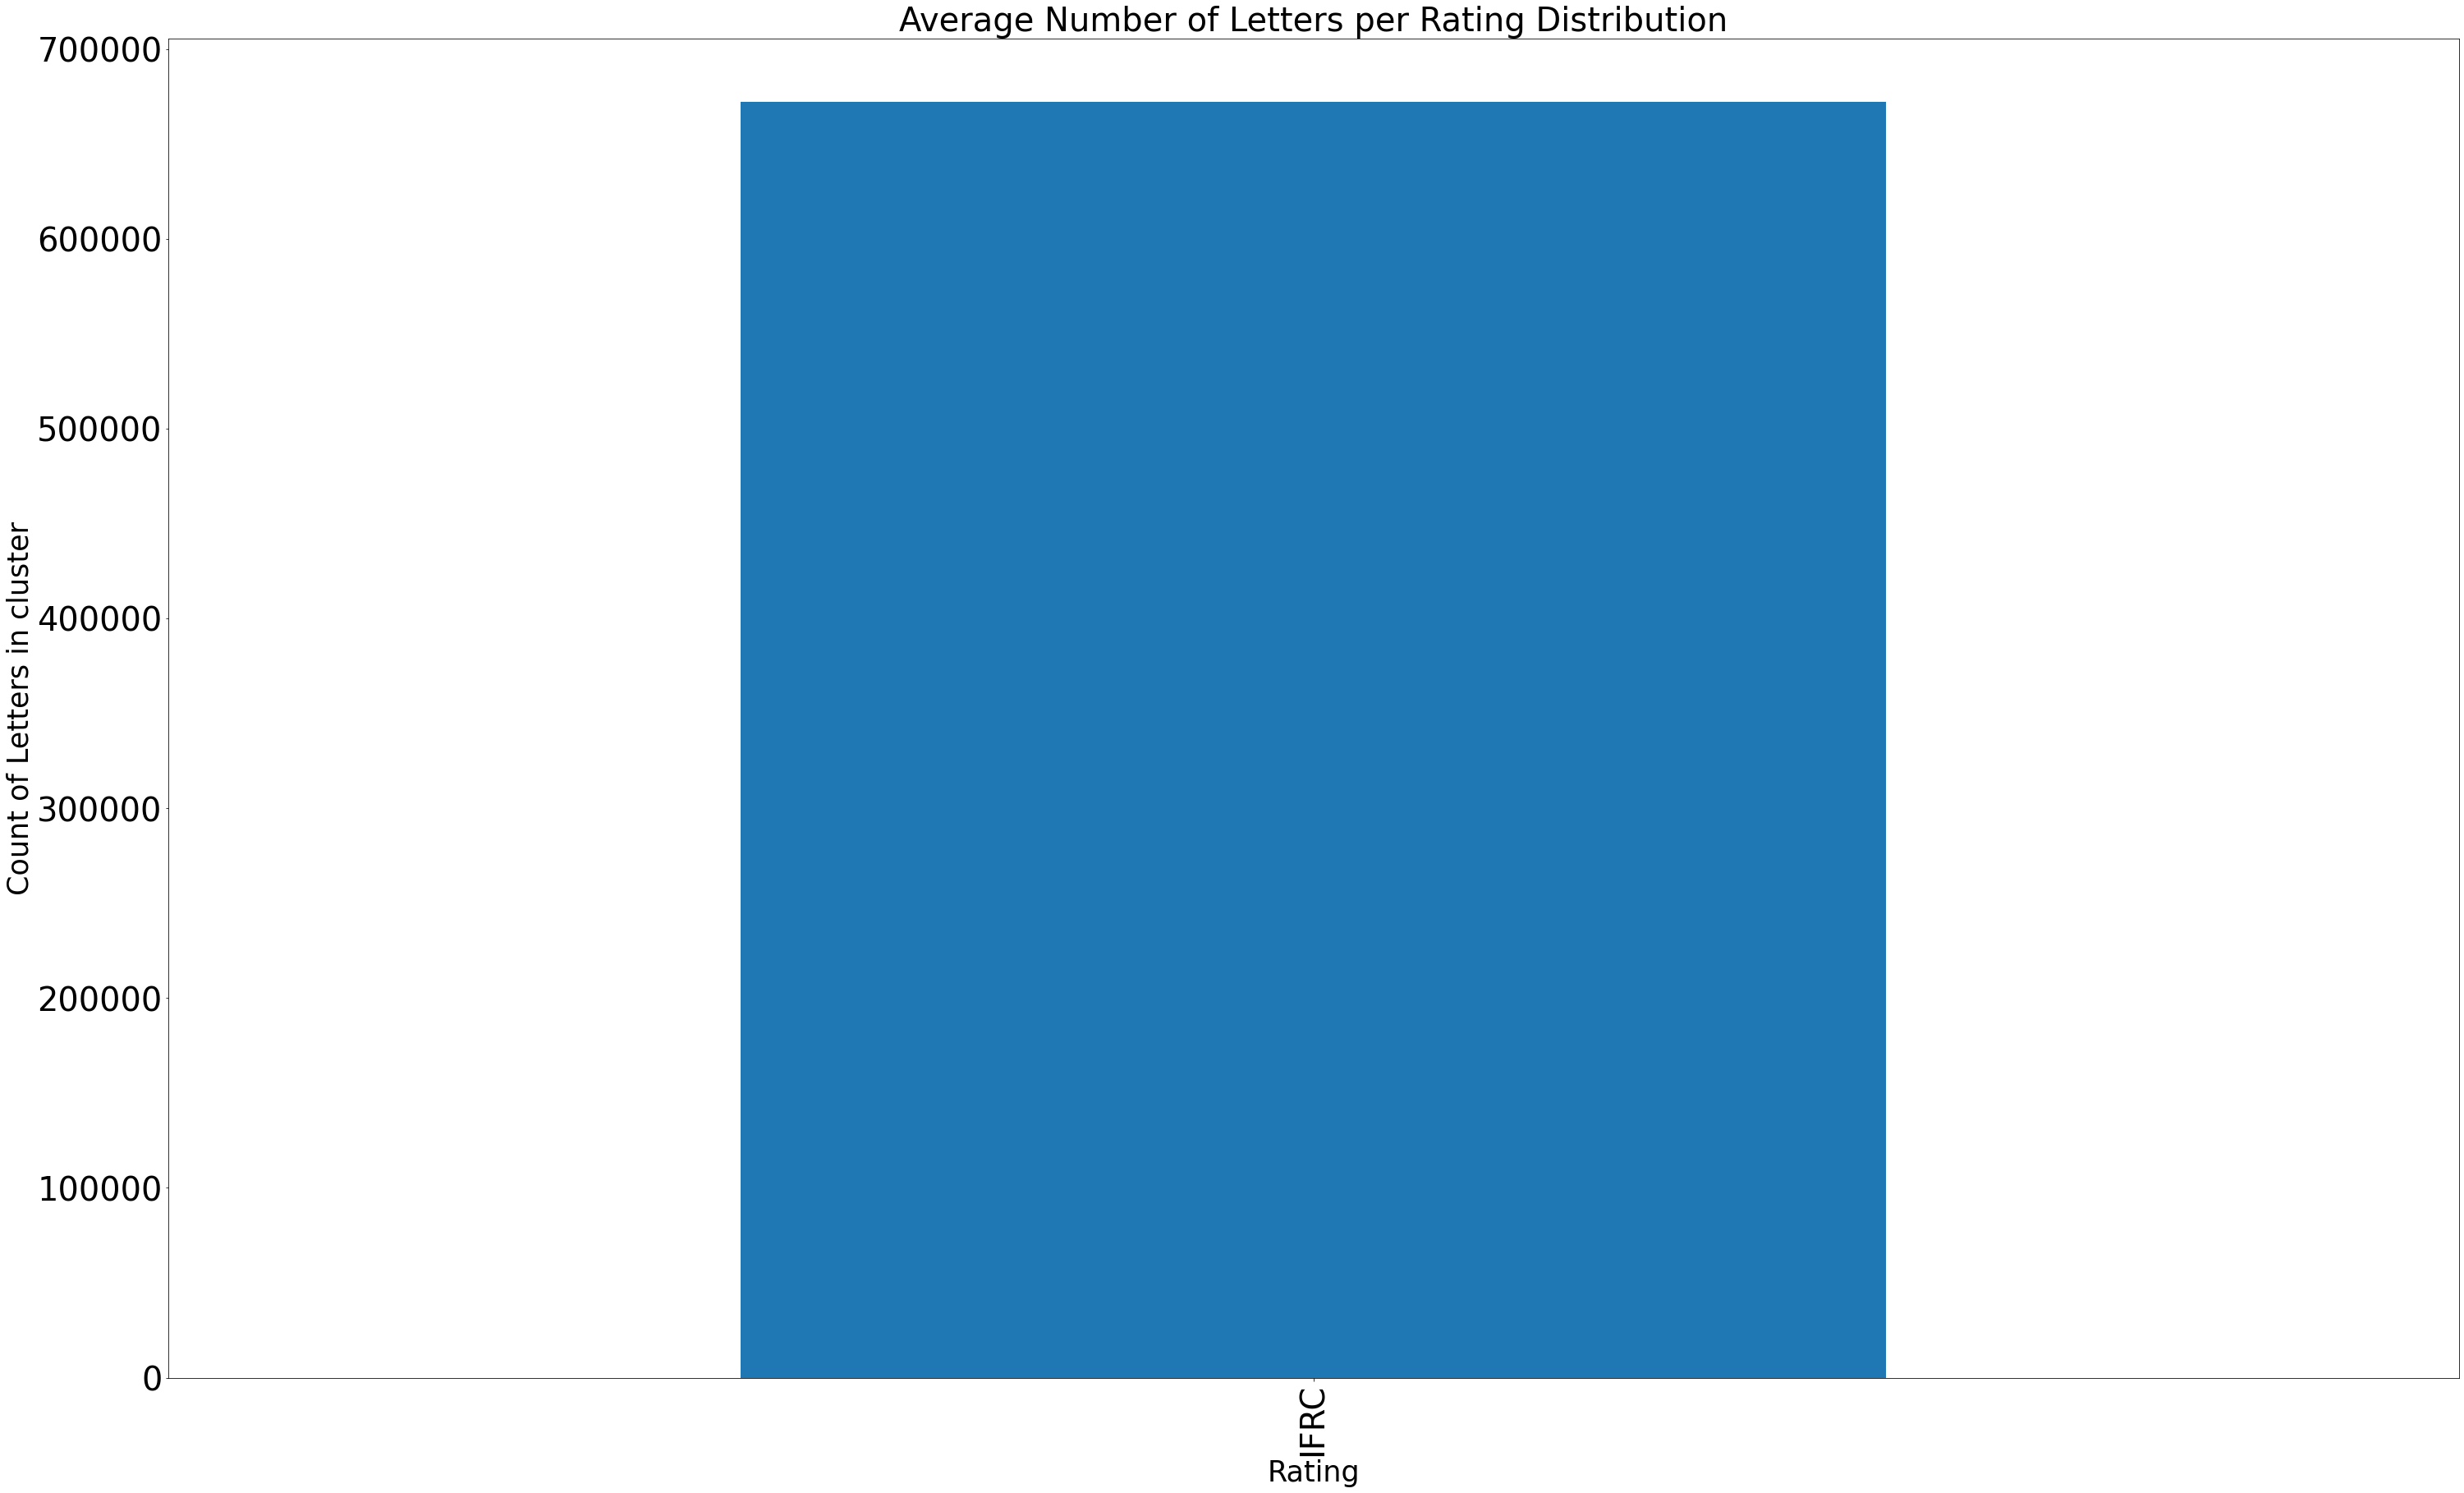

In [33]:
letter_avg = df.groupby('cluster')['word_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in cluster', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

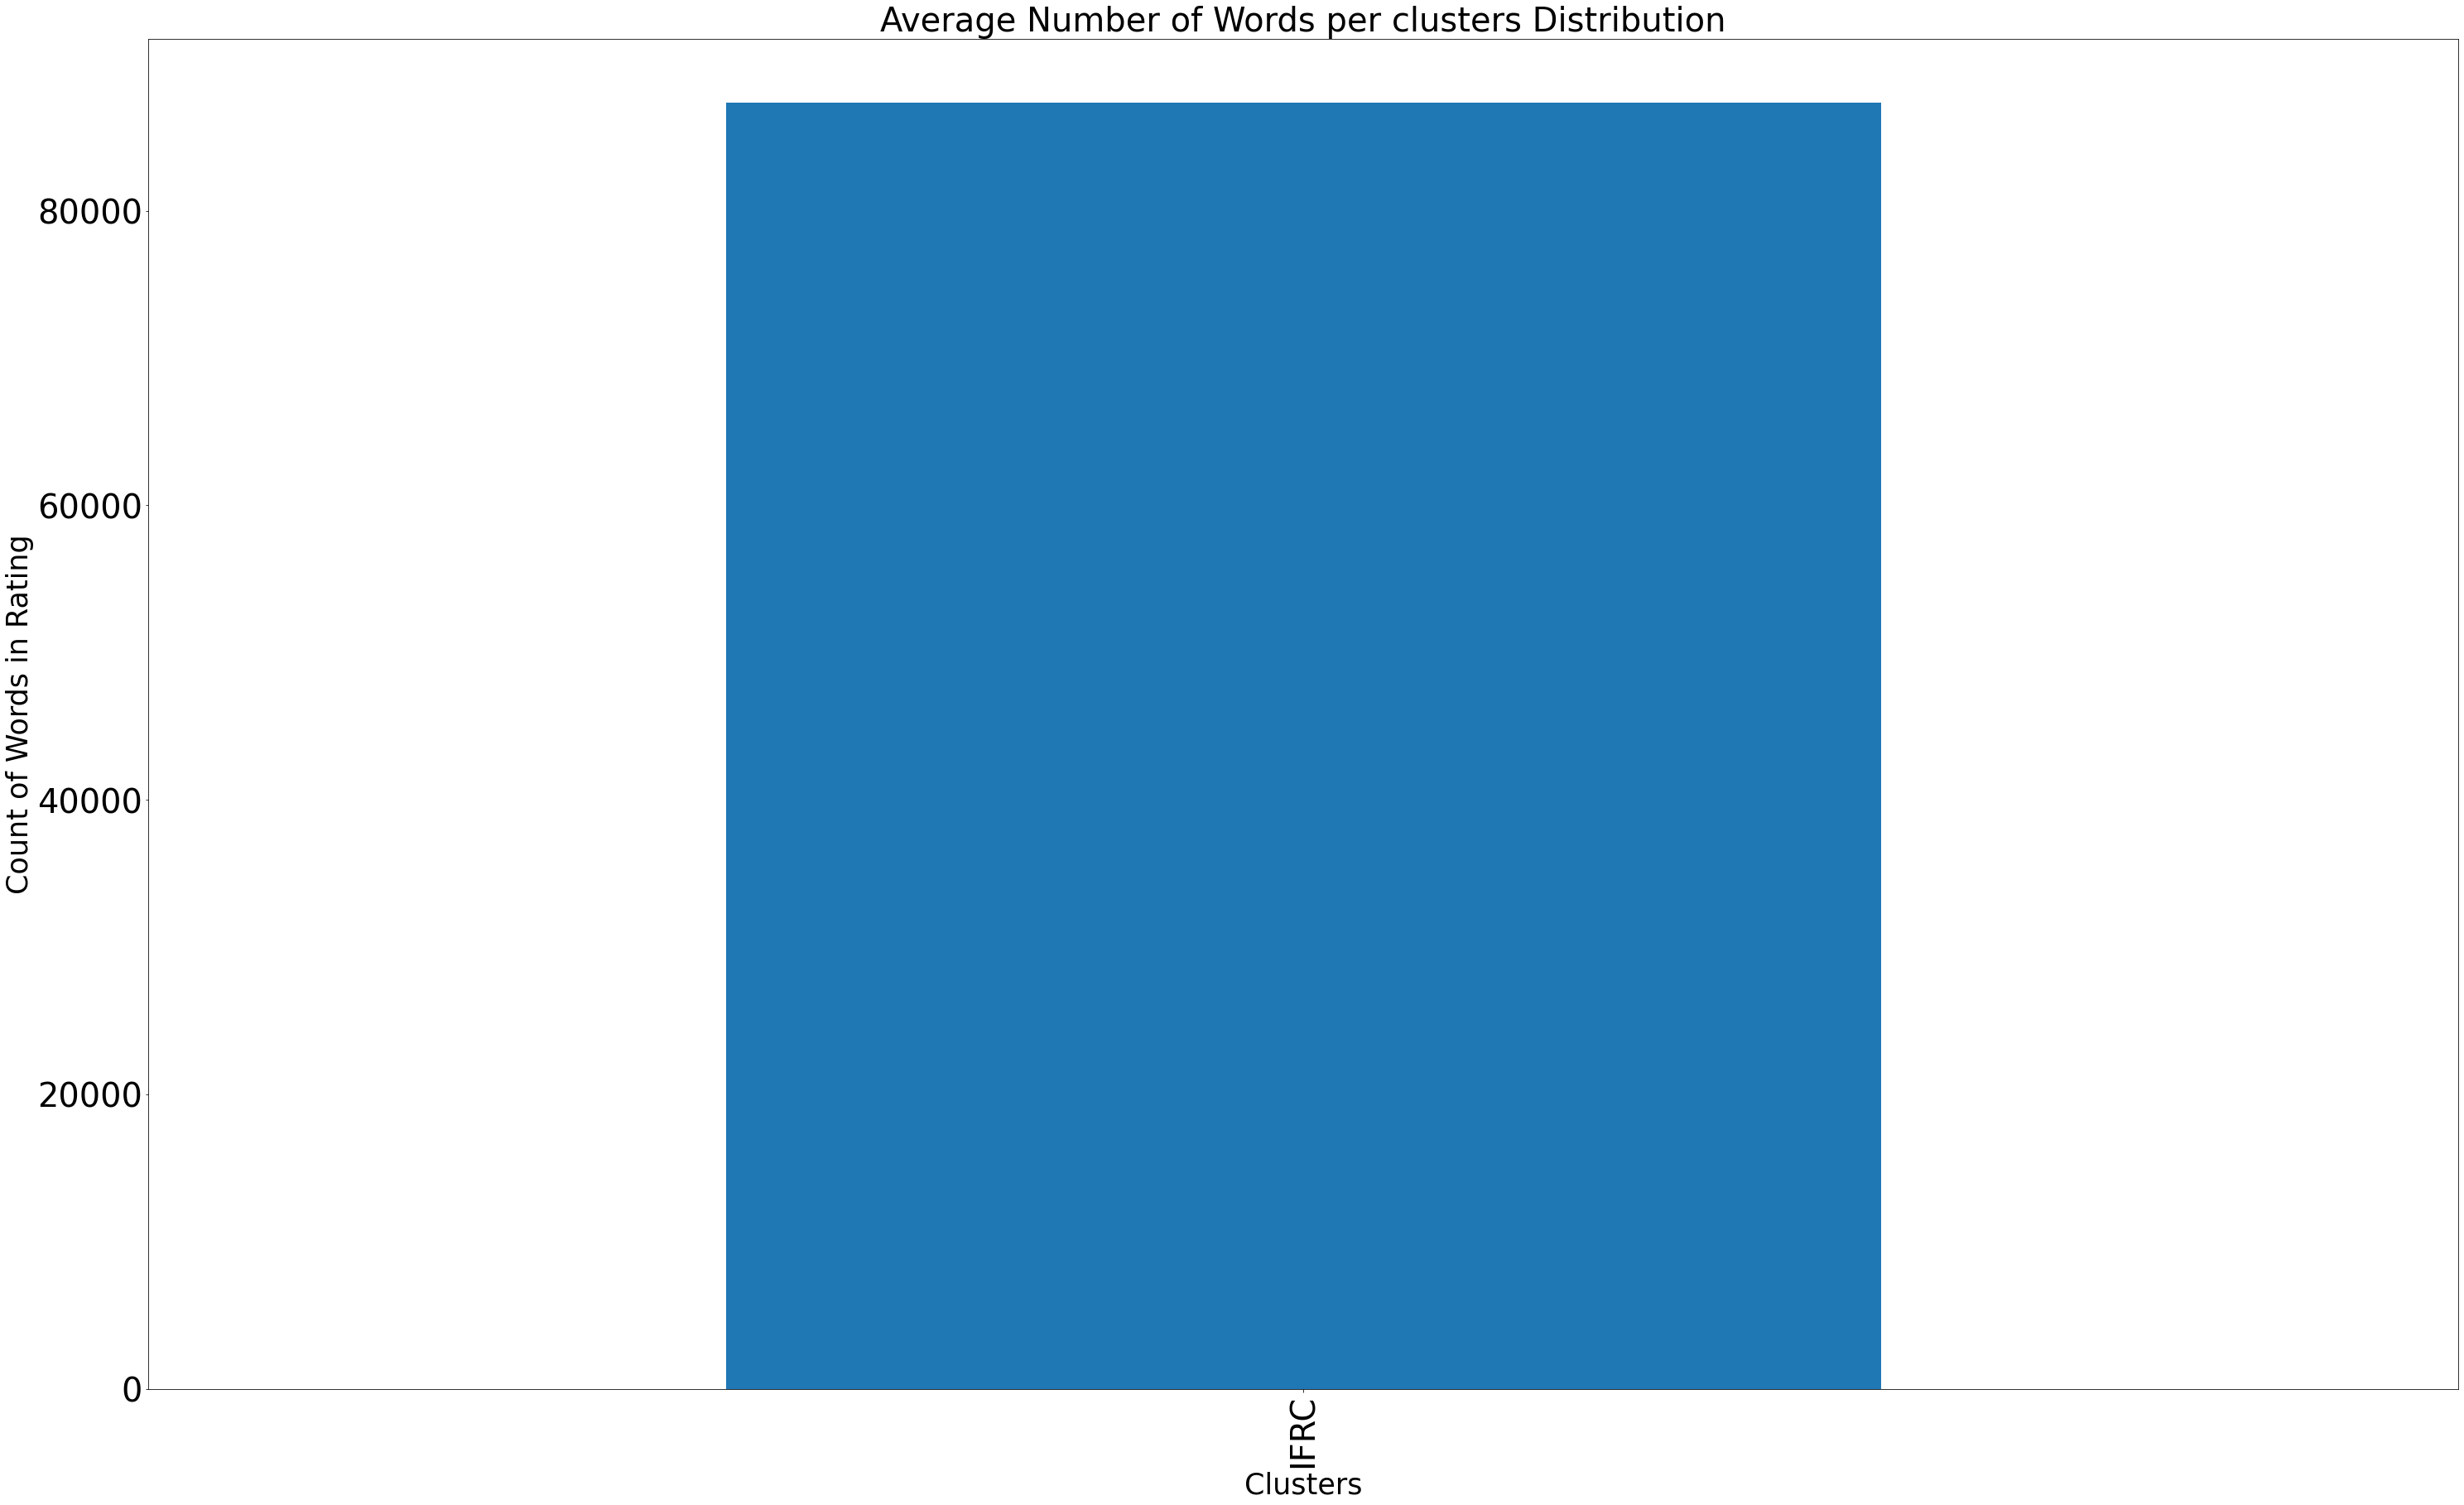

In [34]:
word_avg = df.groupby('cluster')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Clusters', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per clusters Distribution', fontsize=40)
plt.show()

## Term Frequency Analysis

In [35]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['leave', 'million', 'behindworld', 'disaster', 'report', '2018the', 'international', 'humanitarian', 'sector', 'must', 'respond', 'need', 'world™s', 'vulnerable', 'people', 'international', 'federation', 'red', 'cross', 'red', 'crescent', 'society', 'world™s', 'large', 'volunteer˜based', 'humanitarian', 'network', '˚˛˝', 'member', 'national', 'red', 'cross', 'red', 'crescent', 'society', 'worldwide', 'virtually', 'every', 'community', 'reach', '˚˙˝.ˆ', 'million', 'people', 'annually', 'long˜term', 'service', 'development', 'programmes', 'well', '˚˚˝', 'million', 'people', 'disaster', 'response', 'early', 'recovery', 'programme', 'act', 'aˇer', 'disaster', 'health', 'emergency', 'meet', 'need', 'improve', 'live', 'vulnerable', 'people', 'impartiality', 'nationality', 'race', 'gender', 'religious', 'belief', 'class', 'political', 'opinion', 'guide', 'strategy', '˜˚˜˚', 'œ', 'collective', 'plan', 'action', 'tackle', 'major', 'humanitarian', 'development', 'challenge', 'decade', 'œ', 'com

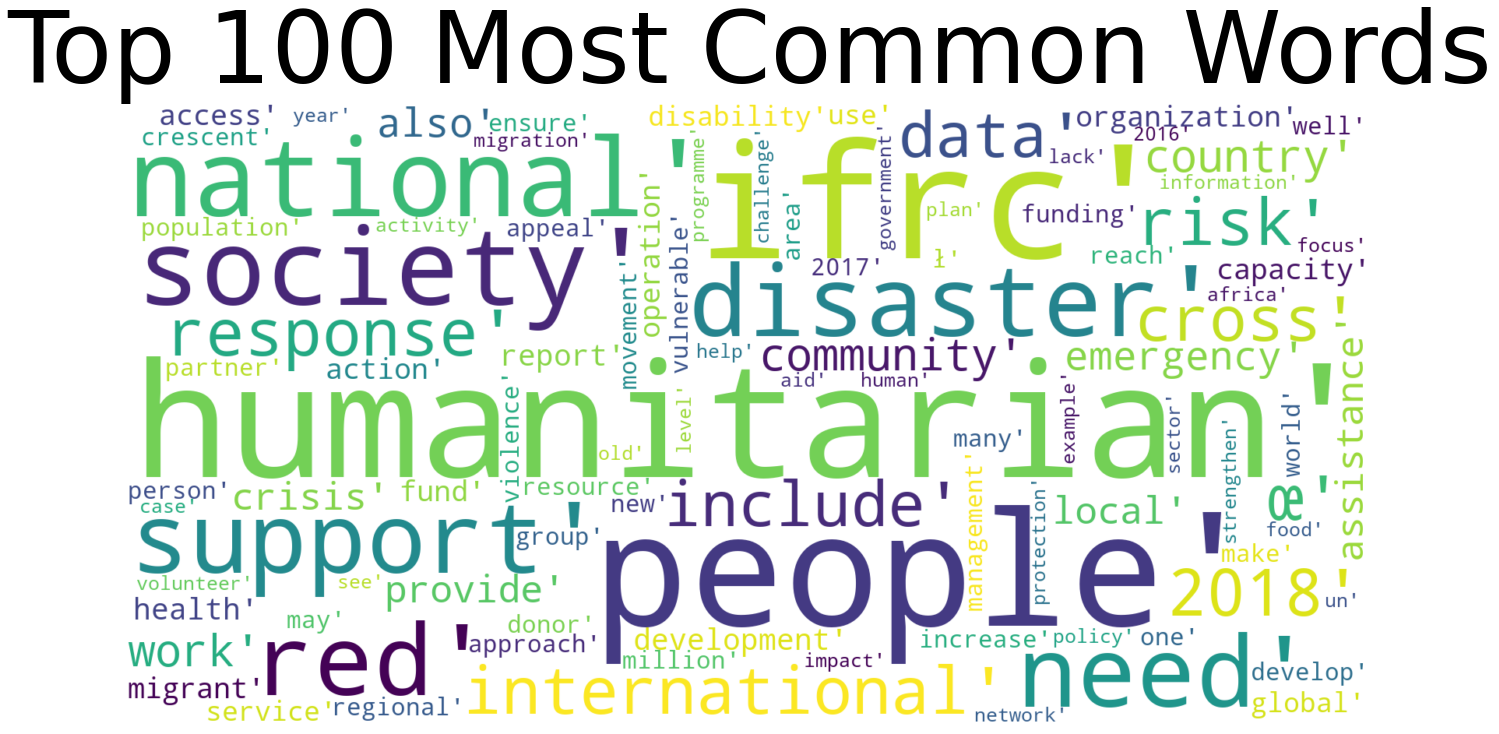

In [36]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

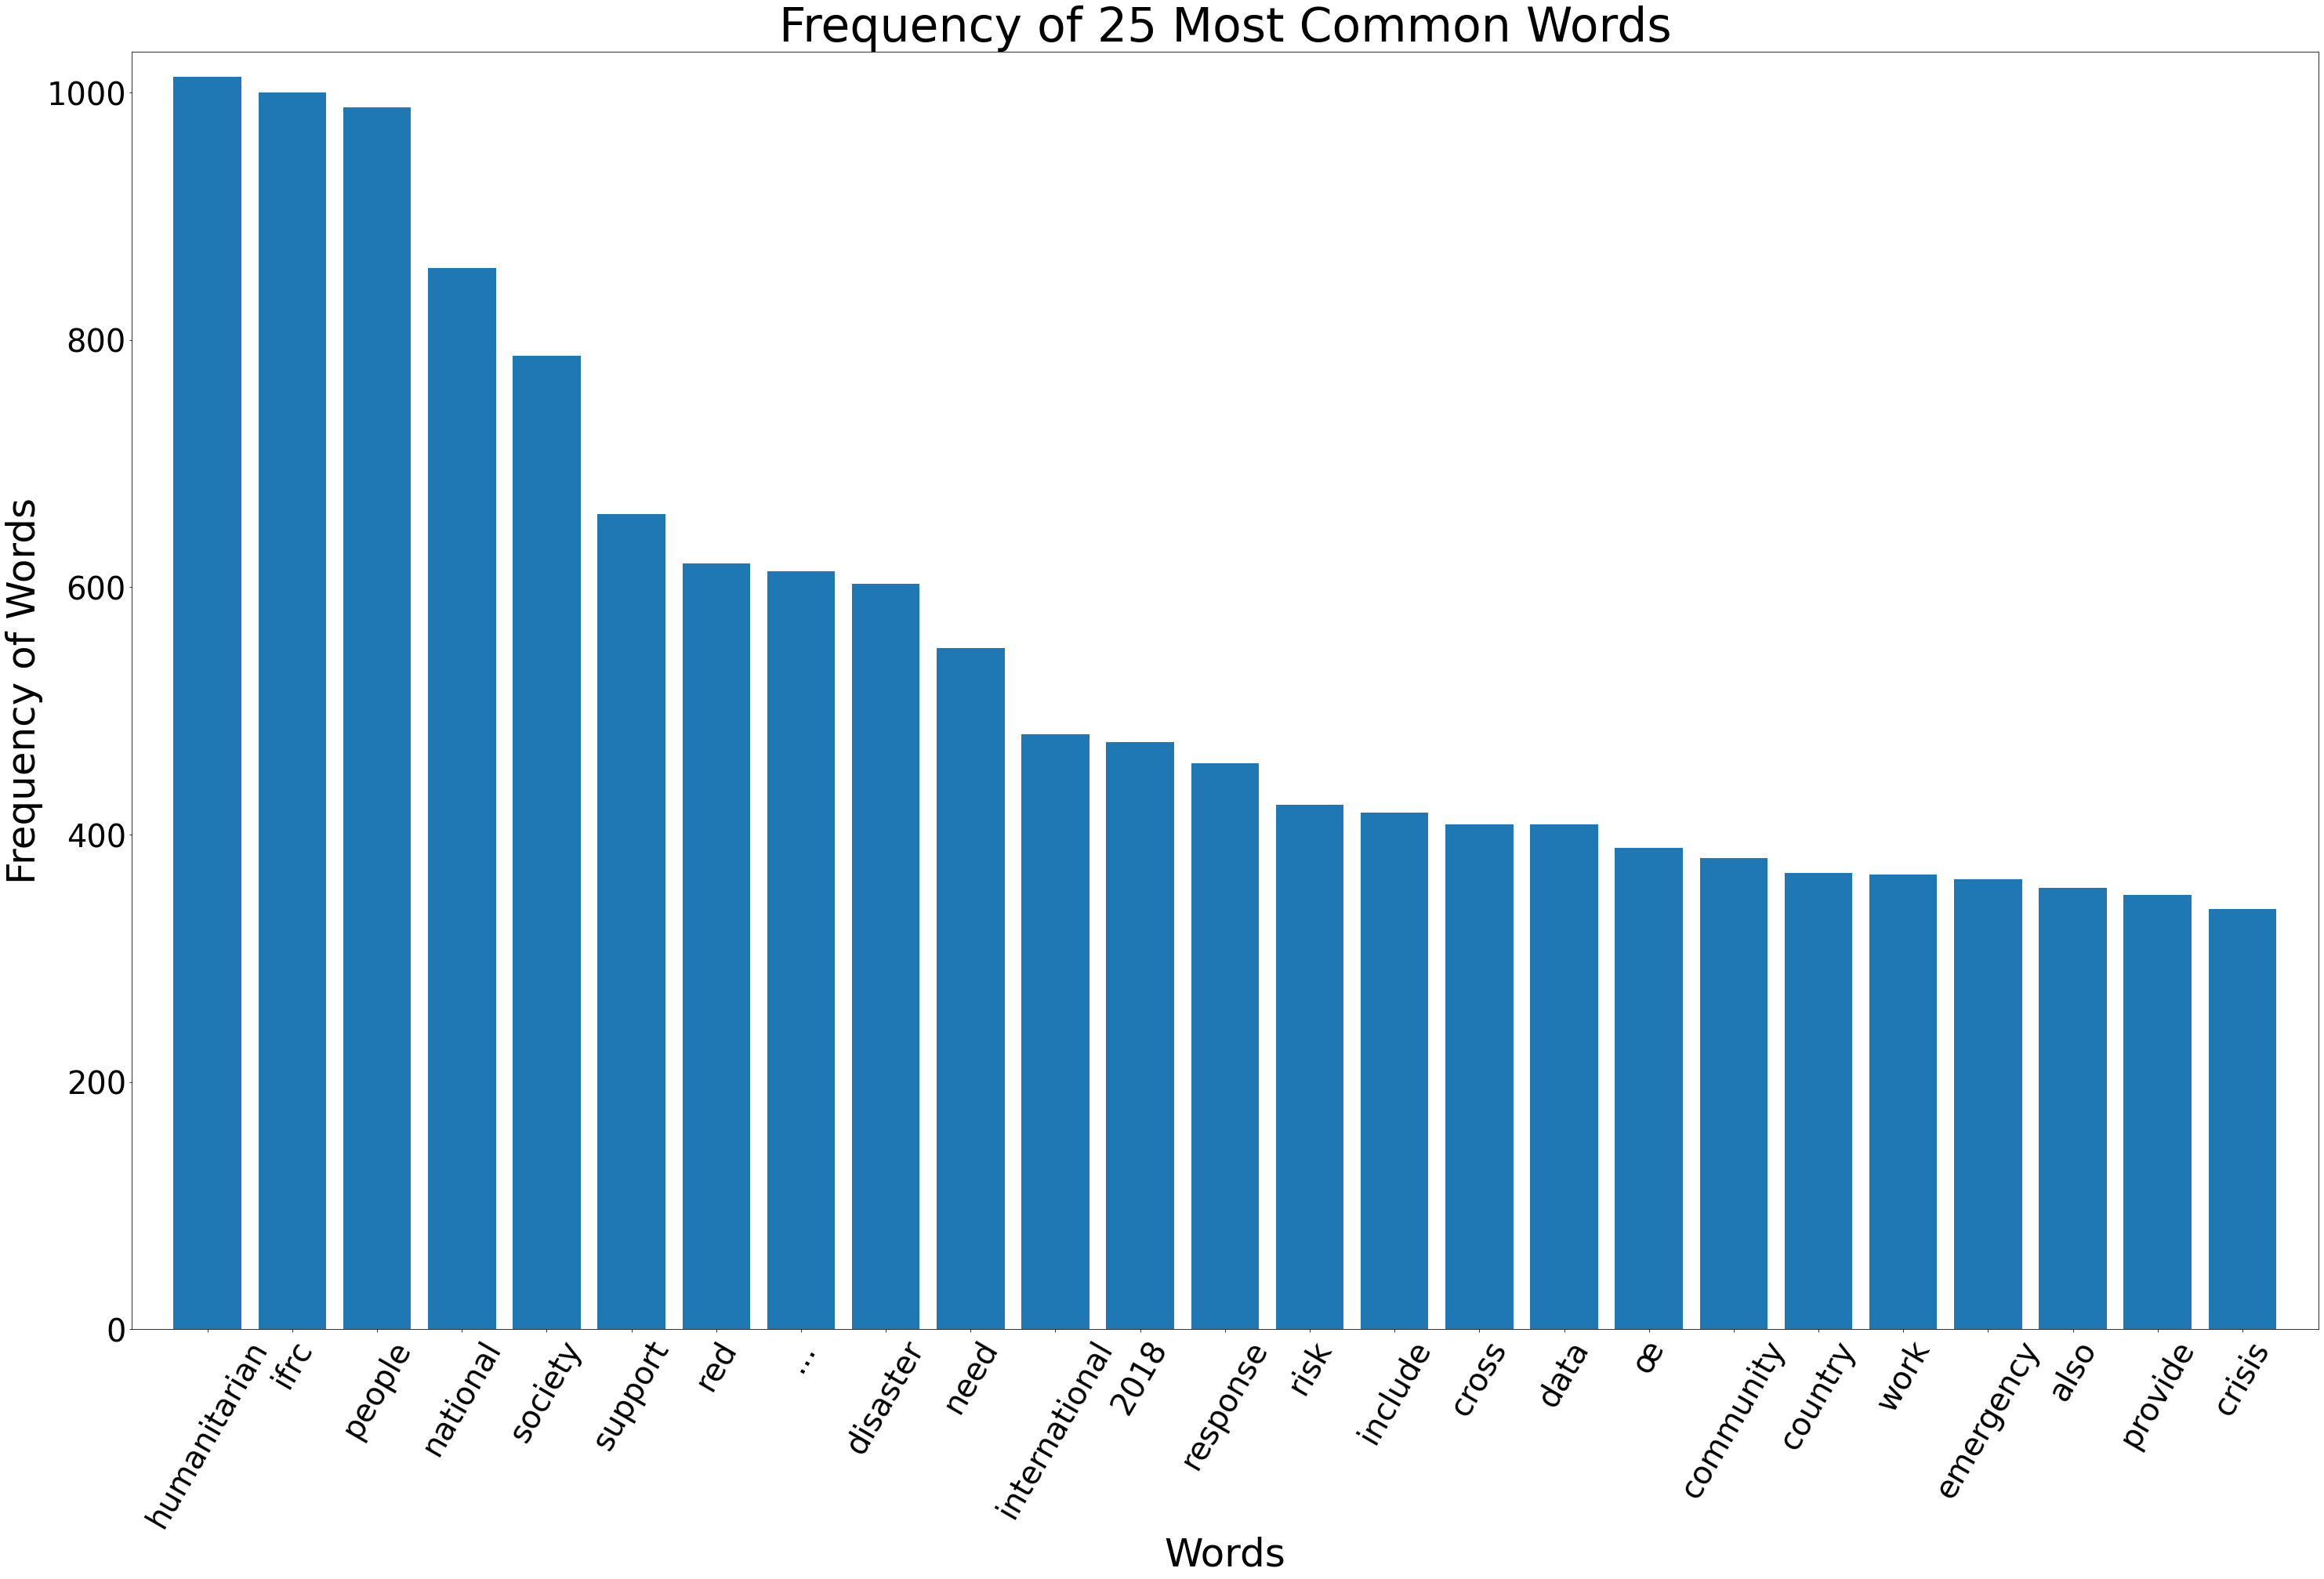

In [37]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

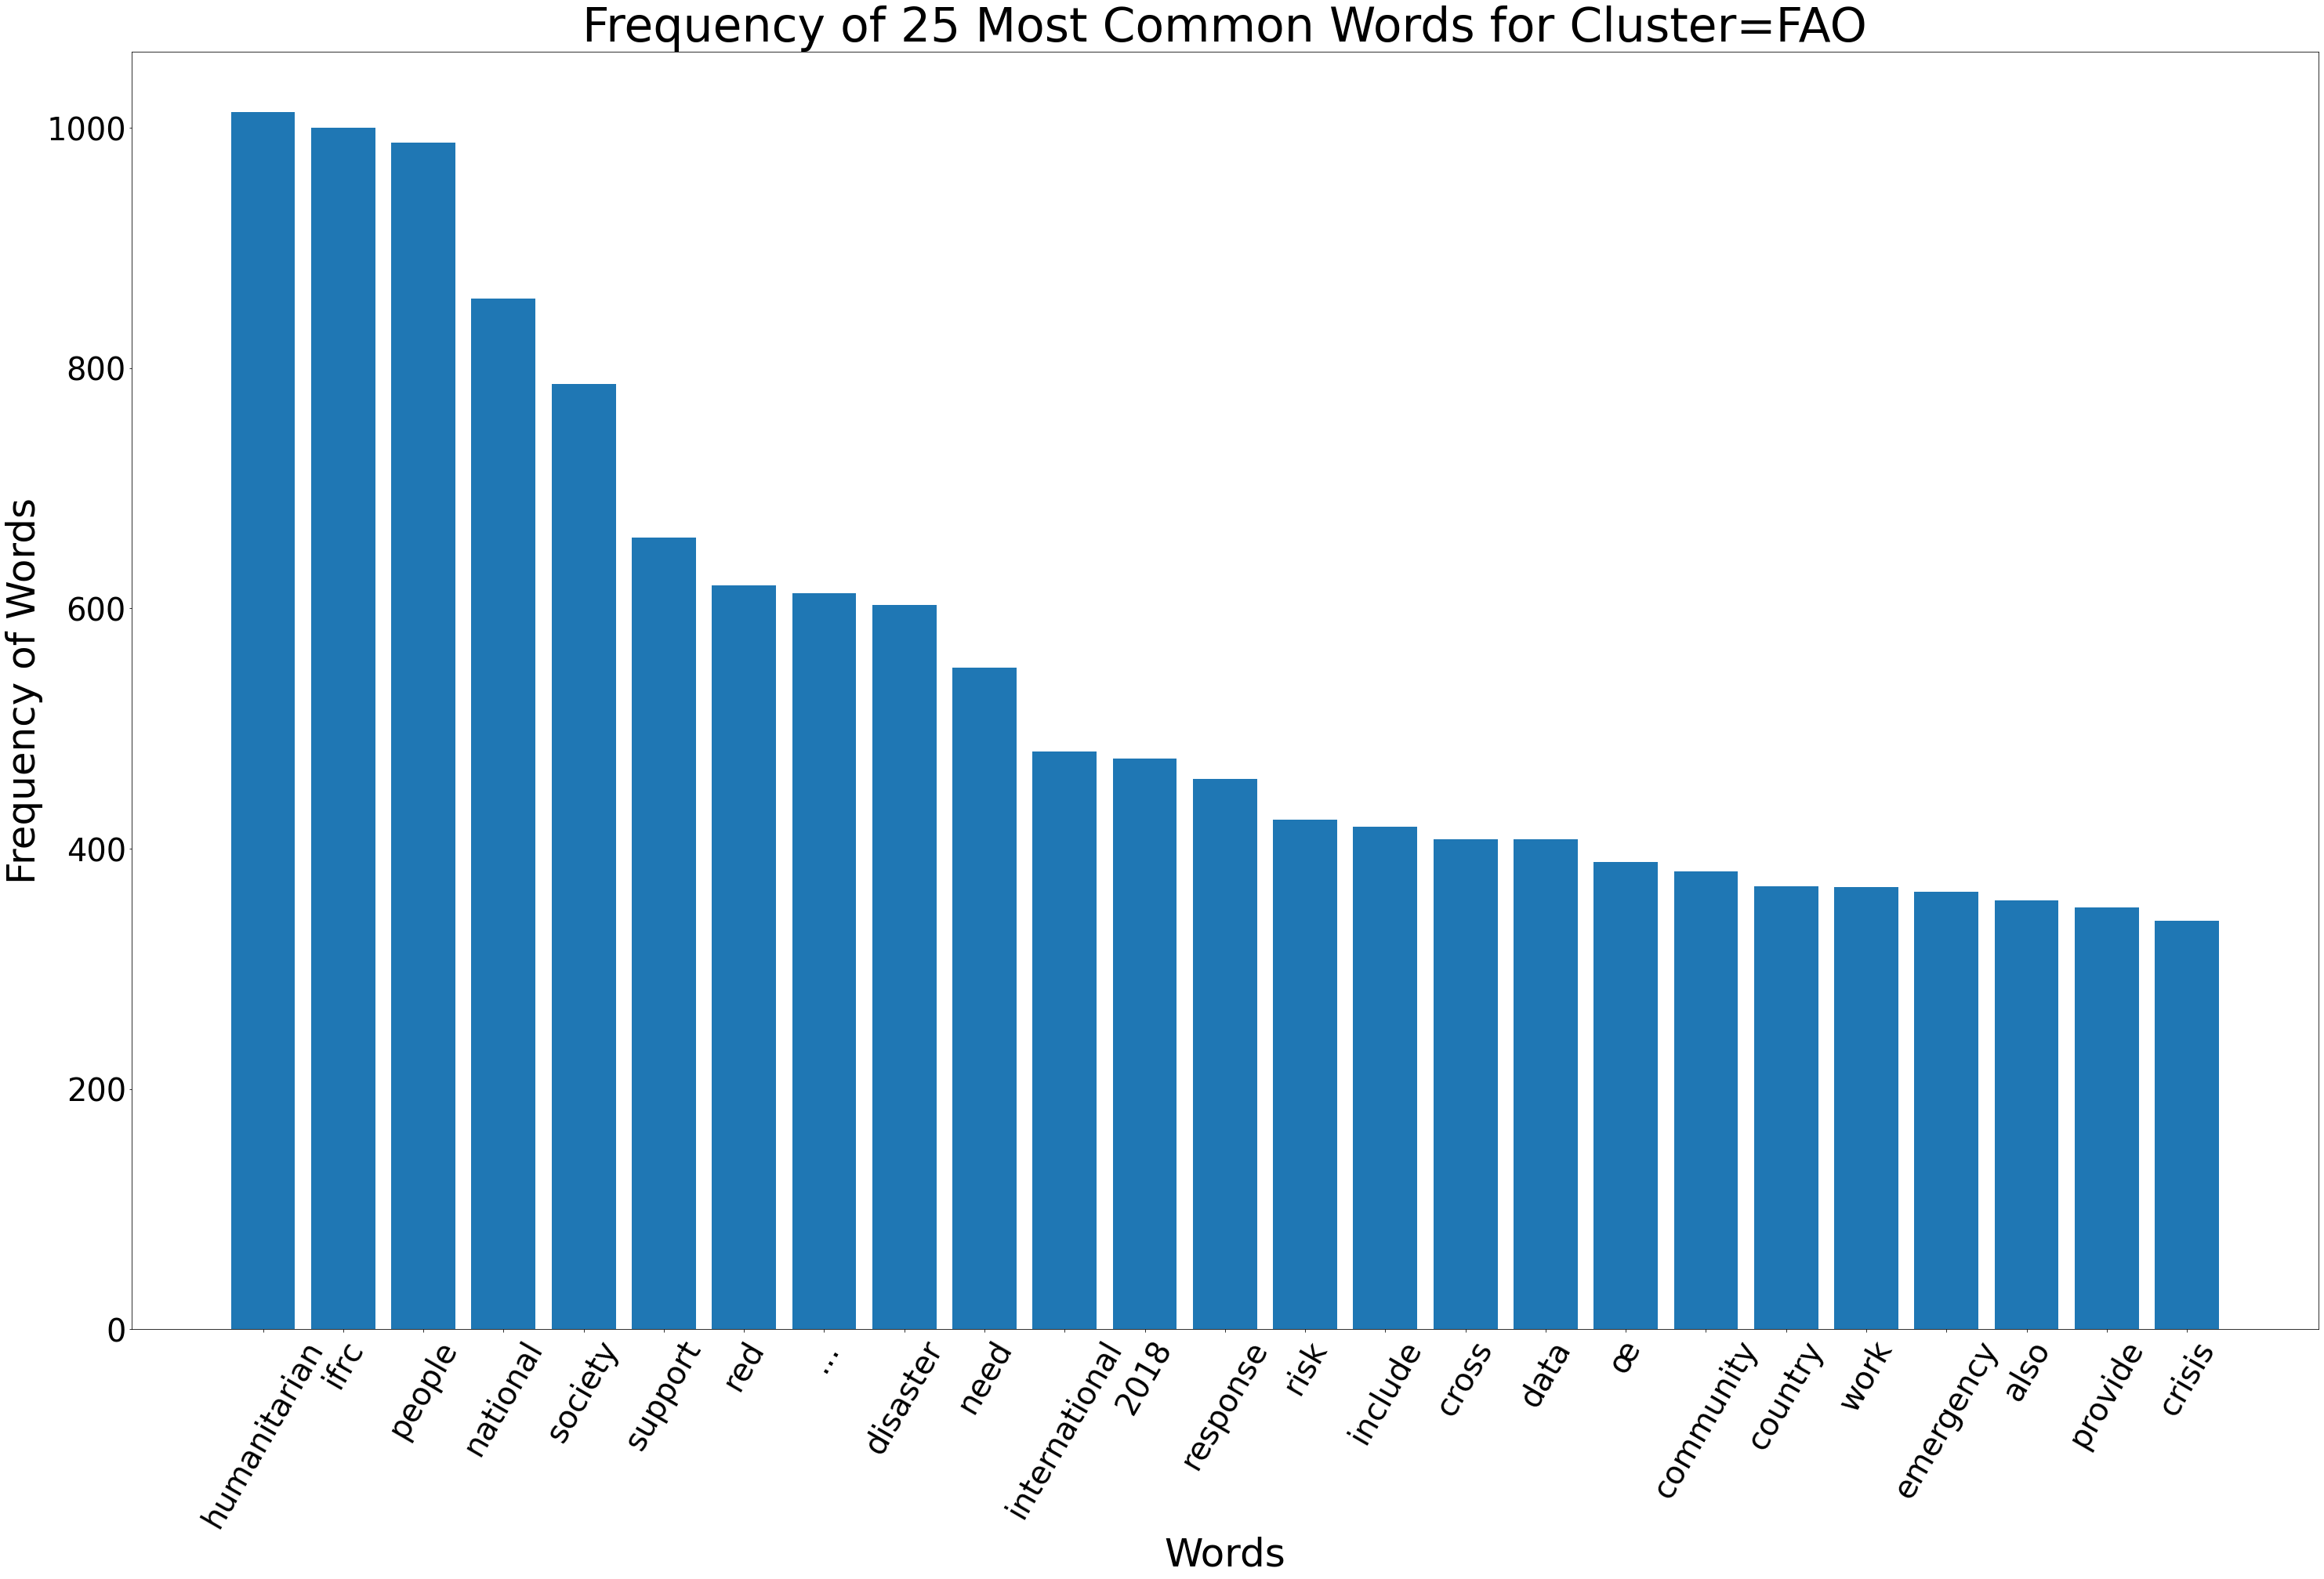

In [38]:
group_by = df.groupby('cluster')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Cluster=FAO', fontsize=60)
plt.show()

## Topic Modeling

In [39]:
#tf_vectorizer = CountVectorizer(max_df=0.9, min_df=1, max_features=0)
tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,000,0008006004002000,000km,003,012,020,0222chad588,030,035pakistan,039,...,ﬁunless,ﬁwell,ﬁwhat,ﬁwhen,ﬁwhile,ﬁwho,ﬁwhy,ﬁwithin,ﬂexperience,ﬂworld
0,91,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Dirichlet Allocation (LDA) Topic Modeling

In [40]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
ifrc national humanitarian people society disaster need support response international
Topic 1:
humanitarian ifrc people national support society cross 2018 red disaster
Topic 2:
people humanitarian ifrc national support society need cross red risk
Topic 3:
ifrc humanitarian national society people support red international disaster cross
Topic 4:
ifrc national people humanitarian disaster society need support red crisis
Topic 5:
ifrc national people humanitarian society red 2018 international response work
Topic 6:
humanitarian people ifrc society national support international need disaster community
Topic 7:
ifrc humanitarian people national society support red disaster need international
Topic 8:
ifrc people national red humanitarian disaster support need cross also
Topic 9:
humanitarian ifrc people society red national disaster need international support


## pyLDAvis

In [91]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      266.949280  -87.736923       1        1  99.998857
3      361.432953  169.902664       2        1   0.000127
0      152.742493  122.193718       3        1   0.000127
7     -192.249542 -111.173729       4        1   0.000127
8     -113.220642  366.560089       5        1   0.000127
2       59.585045 -252.585739       6        1   0.000127
1      141.053116  349.575104       7        1   0.000127
6       18.781530  -41.212284       8        1   0.000127
4     -272.999847  126.080170       9        1   0.000127
5      -55.898830  156.538971      10        1   0.000127, topic_info=     Category        Freq          Term       Total  loglift  logprob
4009  Default  675.000000      economic  675.000000  30.0000  30.0000
5079  Default  507.000000        income  507.000000  29.0000  29.0000
6417  Default  493.000000     nutrition  493.000000  28.0000  28.0000
8826  Default  487.000000          year  487.000000  27.0000  27.0000
5286  Default  485.000000    insecurity  485.000000  26.0000  26.0000
...       ...         ...           ...         ...      ...      ...
6328  Topic10    0.000011           new  137.535232  -2.7494  -9.0994
4191  Topic10    0.000011      estimate  273.982737  -3.4386  -9.0994
6508  Topic10    0.000011        online  207.736483  -3.1618  -9.0994
5920  Topic10    0.000011  malnutrition  222.567734  -3.2307  -9.0994
6813  Topic10    0.000011    population  312.543986  -3.5702  -9.0994

[629 rows x 6 columns], token_table=      Topic      Freq  \
term                    
4         1  0.919349   
141       1  0.919349   
154       1  1.001014   
227       1  0.919349   
237       1  0.919349   
...     ...       ...   
8834      1  0.919349   
8872      1  0.919349   
8892      1  0.919349   
8918      1  0.919349   
8943      1  0.919349   

                                                                                  Term  
term                                                                                    
4     000198119871985198319891991199319951997199920012003200520072009201120132015china  
141                                                                                0he  
154                                                                                 10  
227                                                                          1179œ1199  
237                                       12012201820122018201220182012201820122018149  
...                                                                                ...  
8834                                                                           yearœon  
8872                                                                             åland  
8892                                                                       ﬁbargaining  
8918                                                                           ﬁmaking  
8943                                                                             ﬁthis  

[337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 1, 8, 9, 3, 2, 7, 5, 6])

## TF-IDF

In [96]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=None, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,00,000,0000069227,0001,000198119871985198319891991199319951997199920012003200520072009201120132015china,0002,0003,0004,0005,0006,...,ﬁsoftﬂ,ﬁsupply,ﬁthe,ﬁthis,ﬁtrade,ﬁtradeﬂ,ﬁvery,ﬁzero,ﬁzeroﬂ,ﬂany
0,0.008473,0.008755,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,...,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282


## Non-Negative Matrix Factorization (NMF)

In [100]:
nmf = NMF(n_components=1, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
food country economic income nutrition year insecurity child world commodity
